<a href="https://colab.research.google.com/github/kap1anittt/ABTestChecker/blob/main/week_01_ml_intro/Homework/hw_1_game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

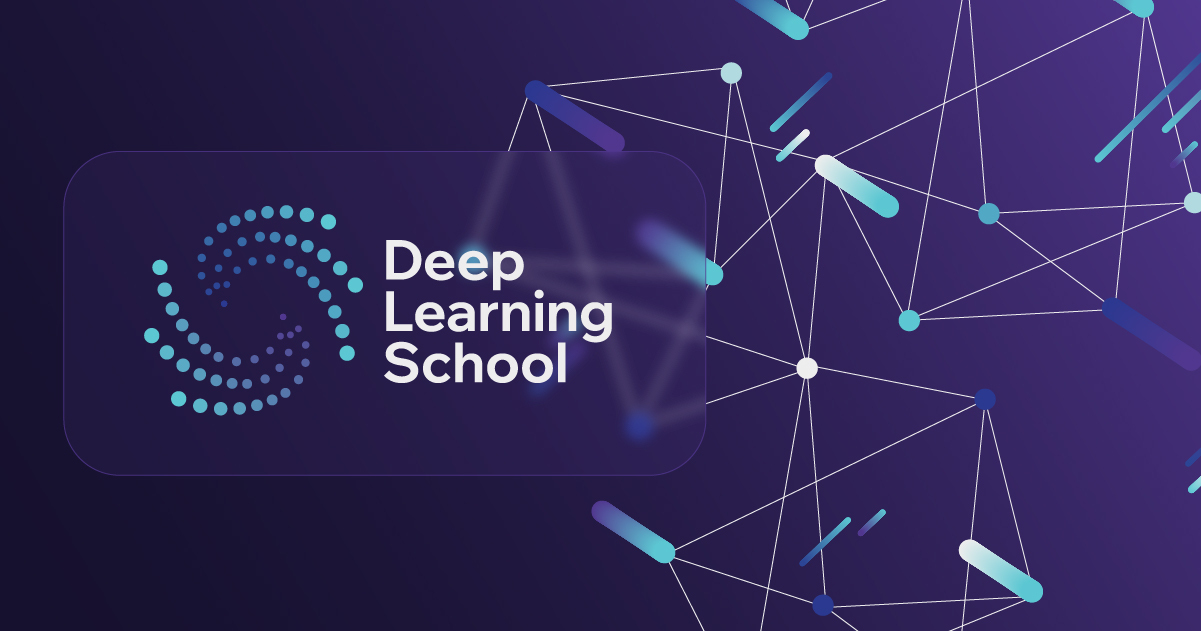

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

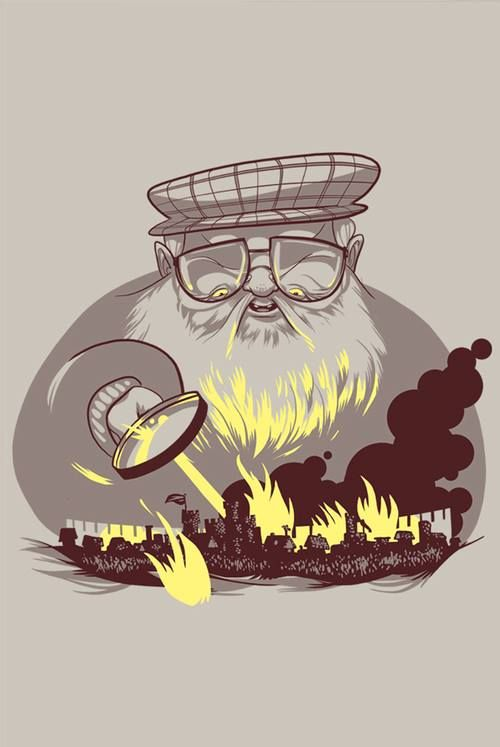

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 79.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 56.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
train_data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [54]:
test_data = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [6]:
train_data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [12]:
# Явное указание числовых типов
print(test_data.describe(include=['int64', 'float64']).T[['count', 'min', 'max']])

                  count       min       max
male              389.0       0.0       1.0
dateOfBirth       154.0     -28.0  298299.0
book1             389.0       0.0       1.0
book2             389.0       0.0       1.0
book3             389.0       0.0       1.0
book4             389.0       0.0       1.0
book5             389.0       0.0       1.0
isAliveMother       3.0       1.0       1.0
isAliveFather       4.0       0.0       0.0
isAliveHeir         2.0       0.0       1.0
isAliveSpouse      76.0       0.0       1.0
isMarried         389.0       0.0       1.0
isNoble           389.0       0.0       1.0
age               154.0 -298001.0     100.0
numDeadRelations  389.0       0.0      15.0
popularity        389.0       0.0       1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [ ]:
# ...

В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

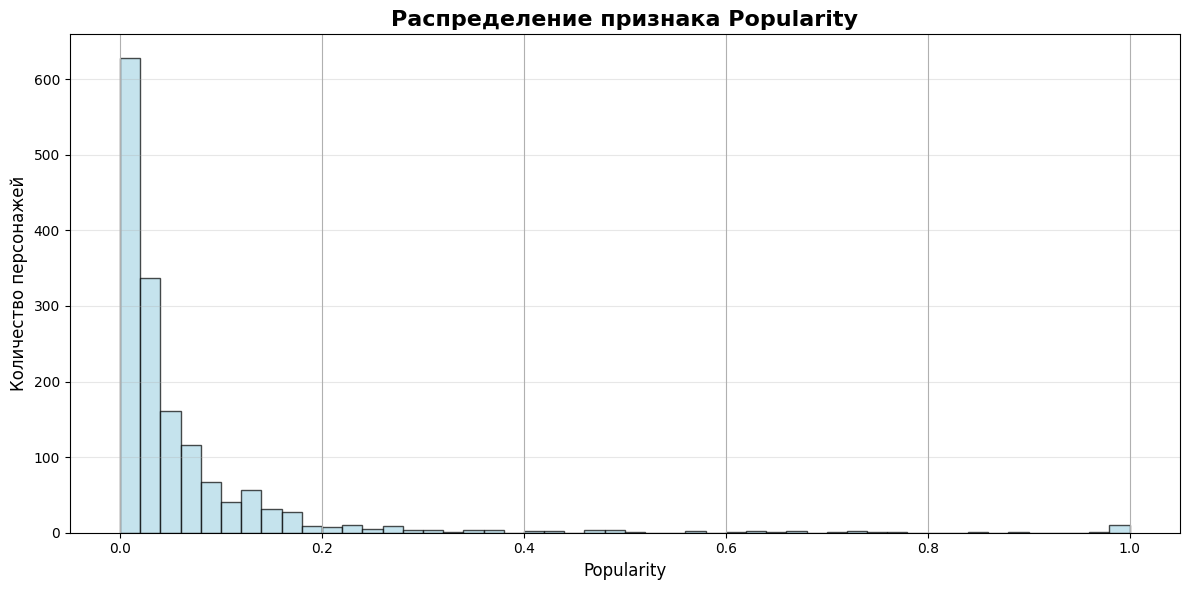

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Настройка размера графика
plt.figure(figsize=(12, 6))

# Построение гистограммы с 50 интервалами
train_data['popularity'].hist(bins=50, color='lightblue', edgecolor='black', alpha=0.7)

# Настройка заголовка и подписей
plt.title('Распределение признака Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Количество персонажей', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Показываем график
plt.tight_layout()
plt.show()

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [15]:
train_data['boolDeadRelations'] = (train_data['numDeadRelations'] > 0).astype(int)
test_data['boolDeadRelations'] = (test_data['numDeadRelations'] > 0).astype(int)

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [16]:
train_data['age_value'] = train_data['age'].fillna(0)  # Заменяем NaN на 0
train_data['age_no_data'] = [1 if np.isnan(x) else 0 for x in train_data['age']]

# Создаем новые признаки для тестовых данных
test_data['age_value'] = test_data['age'].fillna(0)  # Заменяем NaN на 0
test_data['age_no_data'] = [1 if np.isnan(x) else 0 for x in test_data['age']]

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

АНАЛИЗ ПРИЗНАКА CULTURE
Распределение значений culture (включая пропуски):
Всего уникальных значений: 52
Общее количество записей: 1557

Топ-20 самых частых культур:
------------------------------
 1. NaN (пропущено): 1069 записей ( 68.7%)
 2. Northmen            :  94 записей (  6.0%)
 3. Ironborn            :  91 записей (  5.8%)
 4. Free Folk           :  45 записей (  2.9%)
 5. Braavosi            :  39 записей (  2.5%)
 6. Valyrian            :  28 записей (  1.8%)
 7. Ghiscari            :  17 записей (  1.1%)
 8. Dornish             :  17 записей (  1.1%)
 9. Dothraki            :  17 записей (  1.1%)
10. Reach               :  13 записей (  0.8%)
11. Vale mountain clans :  12 записей (  0.8%)
12. Rivermen            :  10 записей (  0.6%)
13. Valemen             :  10 записей (  0.6%)
14. northmen            :   9 записей (  0.6%)
15. Westerman           :   8 записей (  0.5%)
16. Free folk           :   7 записей (  0.4%)
17. Tyroshi             :   6 записей (  0.4%)
18. Qart

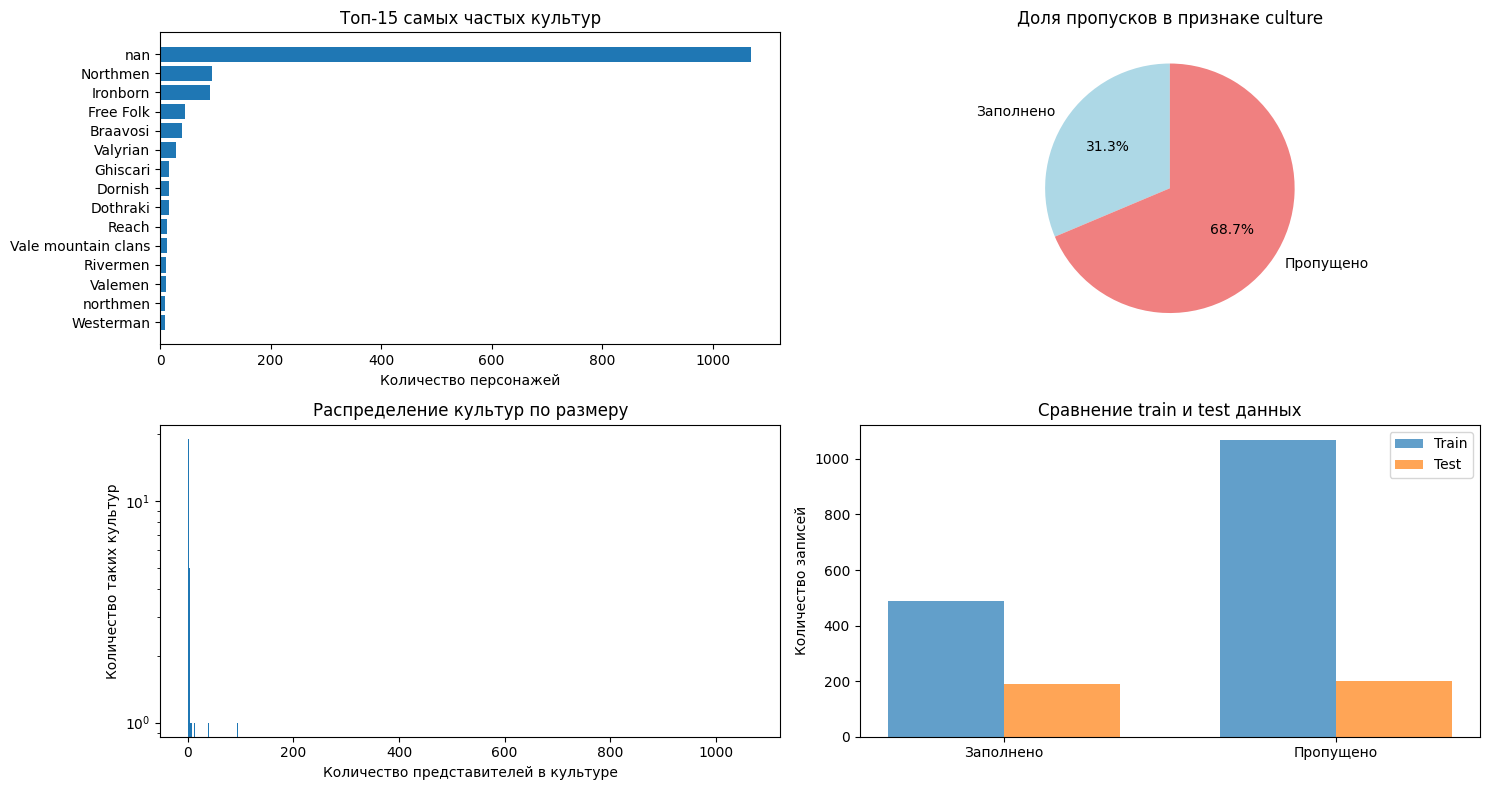

In [17]:
# Анализ признака culture с учетом пропущенных значений
print("АНАЛИЗ ПРИЗНАКА CULTURE")
print("=" * 50)

# Используем value_counts с dropna=False чтобы увидеть пропуски
culture_counts = train_data['culture'].value_counts(dropna=False)

print("Распределение значений culture (включая пропуски):")
print("=" * 40)
print(f"Всего уникальных значений: {culture_counts.shape[0]}")
print(f"Общее количество записей: {len(train_data)}")
print("\nТоп-20 самых частых культур:")
print("-" * 30)

# Показываем топ-20 значений
for i, (culture, count) in enumerate(culture_counts.head(20).items()):
    percentage = (count / len(train_data)) * 100
    if pd.isna(culture):
        print(f"{i+1:2d}. NaN (пропущено): {count:3d} записей ({percentage:5.1f}%)")
    else:
        print(f"{i+1:2d}. {culture:20s}: {count:3d} записей ({percentage:5.1f}%)")

# Статистика по пропускам
print(f"\nСТАТИСТИКА ПО ПРОПУСКАМ:")
print("=" * 30)
nan_count = train_data['culture'].isna().sum()
nan_percentage = (nan_count / len(train_data)) * 100
print(f"Пропущенных значений (NaN): {nan_count} ({nan_percentage:.1f}%)")
print(f"Заполненных значений: {len(train_data) - nan_count} ({100 - nan_percentage:.1f}%)")

# Анализ редких культур
print(f"\nАНАЛИЗ РЕДКИХ КУЛЬТУР:")
print("=" * 30)
rare_cultures = culture_counts[culture_counts == 1]  # Культуры с 1 представителем
print(f"Количество культур с единственным представителем: {len(rare_cultures)}")

if len(rare_cultures) > 0:
    print("Список культур с одним представителем:")
    for culture in rare_cultures.index:
        if pd.isna(culture):
            continue
        print(f"  - {culture}")

# Визуализация распределения
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Топ-15 самых частых культур (исключая пропуски)
plt.subplot(2, 2, 1)
top_cultures = culture_counts.dropna().head(15)
plt.barh(range(len(top_cultures)), top_cultures.values)
plt.yticks(range(len(top_cultures)), top_cultures.index)
plt.title('Топ-15 самых частых культур')
plt.xlabel('Количество персонажей')
plt.gca().invert_yaxis()

# Доля пропусков vs заполненных значений
plt.subplot(2, 2, 2)
labels = ['Заполнено', 'Пропущено']
sizes = [len(train_data) - nan_count, nan_count]
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Доля пропусков в признаке culture')

# Распределение по количеству представителей
plt.subplot(2, 2, 3)
culture_size_distribution = culture_counts.value_counts().sort_index()
plt.bar(culture_size_distribution.index, culture_size_distribution.values)
plt.title('Распределение культур по размеру')
plt.xlabel('Количество представителей в культуре')
plt.ylabel('Количество таких культур')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации

# Сравнение с тестовыми данными
plt.subplot(2, 2, 4)
test_culture_counts = test_data['culture'].value_counts(dropna=False)
test_nan_count = test_data['culture'].isna().sum()

comparison_data = {
    'Train': [len(train_data) - nan_count, nan_count],
    'Test': [len(test_data) - test_nan_count, test_nan_count]
}

x = np.arange(2)
width = 0.35
plt.bar(x - width/2, comparison_data['Train'], width, label='Train', alpha=0.7)
plt.bar(x + width/2, comparison_data['Test'], width, label='Test', alpha=0.7)
plt.xticks(x, ['Заполнено', 'Пропущено'])
plt.ylabel('Количество записей')
plt.title('Сравнение train и test данных')
plt.legend()

plt.tight_layout()
plt.show()

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

РЕЗУЛЬТАТ ГРУППИРОВКИ КУЛЬТУР
Распределение после группировки:
 1. Unknown                  : 1069 записей ( 68.7%)
 2. Essos Nations            : 109 записей (  7.0%)
 3. the North                : 108 записей (  6.9%)
 4. the Iron Islands         :  95 записей (  6.1%)
 5. Other Nations            :  57 записей (  3.7%)
 6. Old Nations              :  32 записей (  2.1%)
 7. the Mountain and the Vale:  25 записей (  1.6%)
 8. Dorne                    :  21 записей (  1.3%)
 9. the Rock                 :  14 записей (  0.9%)
10. the Reach                :  13 записей (  0.8%)
11. the Isles and Rivers     :  10 записей (  0.6%)
12. the Stormlands           :   4 записей (  0.3%)

СРАВНЕНИЕ ДО И ПОСЛЕ ГРУППИРОВКИ:
До группировки: 51 уникальных культур
После группировки: 12 уникальных групп

Культуры, не попавшие в группы (47):
  - 'Andal': 1 записей
  - 'Andals': 1 записей
  - 'Astapori': 4 записей
  - 'Braavos': 1 записей
  - 'Braavosi': 39 записей
  - 'Crannogmen': 2 записей
  - 'Dorn

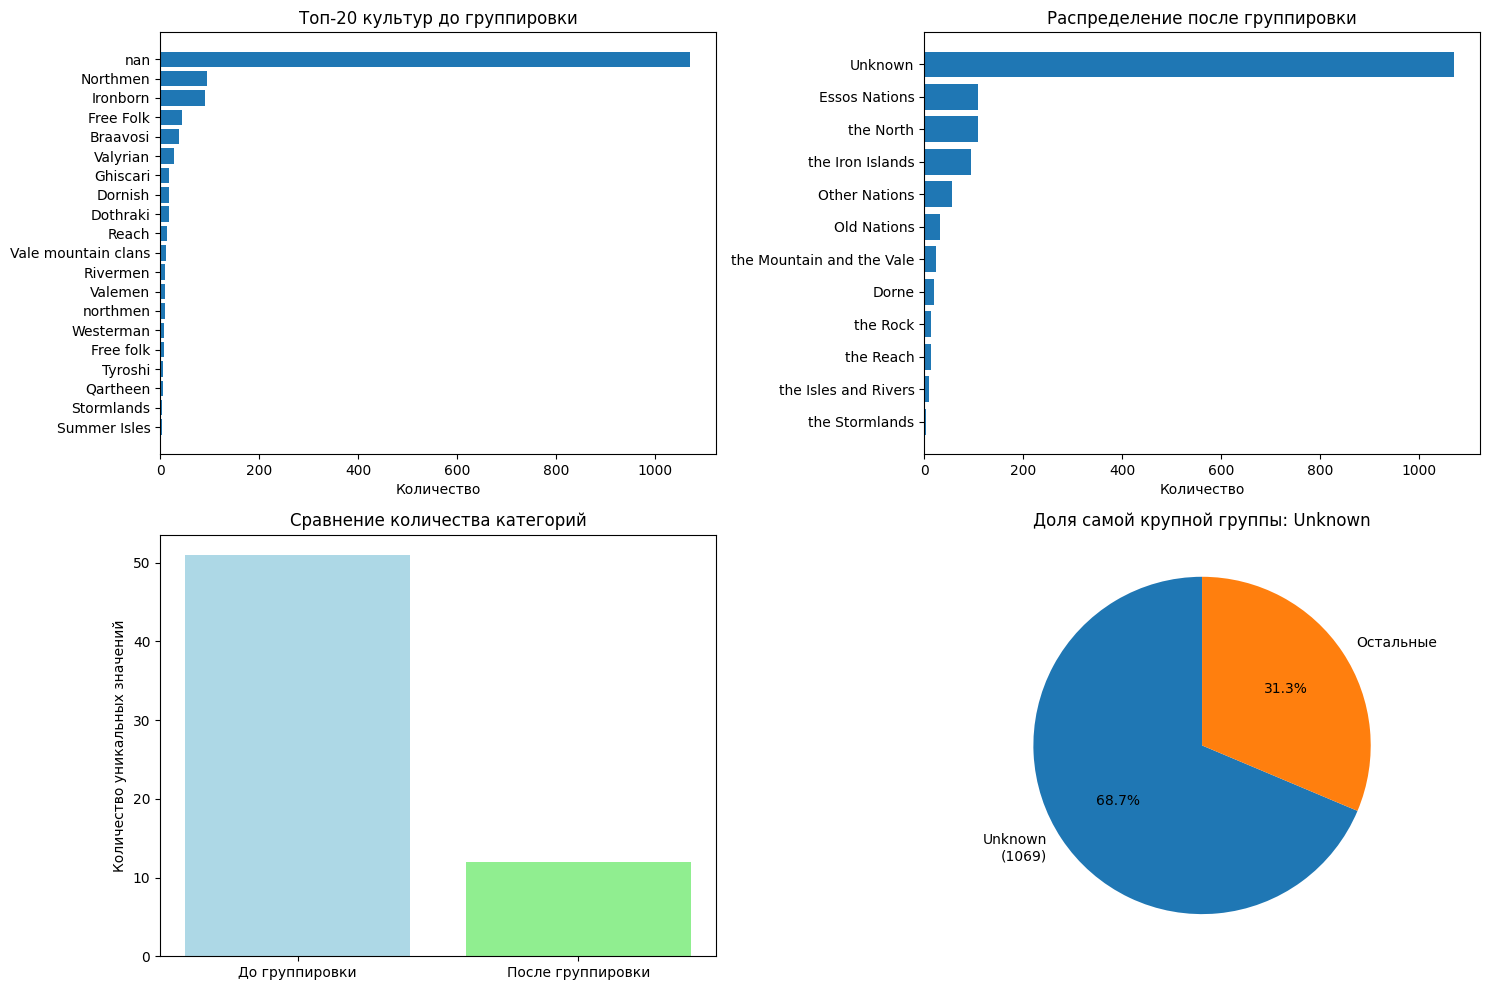

In [19]:
# Словарь для группировки культур
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans', 'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']
}

# Создаем обратный словарь для быстрого поиска
culture_mapping = {}
for group, cultures in cultures_grouped.items():
    for culture in cultures:
        culture_mapping[culture] = group

# Функция для группировки культур
def map_culture_to_group(culture):
    if pd.isna(culture):
        return 'Unknown'  # Отдельная группа для пропусков

    # Приводим к нижнему регистру для унификации
    culture_lower = str(culture).lower().strip()

    # Ищем соответствие в словаре
    for original_culture, group in culture_mapping.items():
        if original_culture.lower() == culture_lower:
            return group

    # Если культура не найдена в словаре, возвращаем оригинальное значение
    # (но это маловероятно, так как словарь довольно полный)
    return culture_lower

# Применяем группировку к данным
train_data['culture_grouped'] = train_data['culture'].apply(map_culture_to_group)
test_data['culture_grouped'] = test_data['culture'].apply(map_culture_to_group)

# Анализируем результат группировки
print("РЕЗУЛЬТАТ ГРУППИРОВКИ КУЛЬТУР")
print("=" * 50)

# Распределение после группировки
grouped_counts = train_data['culture_grouped'].value_counts(dropna=False)

print("Распределение после группировки:")
print("=" * 40)
for i, (group, count) in enumerate(grouped_counts.items()):
    percentage = (count / len(train_data)) * 100
    print(f"{i+1:2d}. {group:25s}: {count:3d} записей ({percentage:5.1f}%)")

# Сравнение до и после группировки
print(f"\nСРАВНЕНИЕ ДО И ПОСЛЕ ГРУППИРОВКИ:")
print("=" * 40)
print(f"До группировки: {train_data['culture'].nunique()} уникальных культур")
print(f"После группировки: {train_data['culture_grouped'].nunique()} уникальных групп")

# Проверяем, какие культуры не попали в группы
original_cultures = set(train_data['culture'].dropna().unique())
mapped_cultures = set(culture_mapping.keys())
unmapped_cultures = original_cultures - set([c.lower() for c in mapped_cultures])

if unmapped_cultures:
    print(f"\nКультуры, не попавшие в группы ({len(unmapped_cultures)}):")
    for culture in sorted(unmapped_cultures):
        count = (train_data['culture'] == culture).sum()
        print(f"  - '{culture}': {count} записей")

# Визуализация результатов
plt.figure(figsize=(15, 10))

# До группировки (топ-20)
plt.subplot(2, 2, 1)
top_original = train_data['culture'].value_counts(dropna=False).head(20)
plt.barh(range(len(top_original)), top_original.values)
plt.yticks(range(len(top_original)), [str(x) for x in top_original.index])
plt.title('Топ-20 культур до группировки')
plt.xlabel('Количество')
plt.gca().invert_yaxis()

# После группировки
plt.subplot(2, 2, 2)
plt.barh(range(len(grouped_counts)), grouped_counts.values)
plt.yticks(range(len(grouped_counts)), grouped_counts.index)
plt.title('Распределение после группировки')
plt.xlabel('Количество')
plt.gca().invert_yaxis()

# Сравнение количества групп
plt.subplot(2, 2, 3)
categories = ['До группировки', 'После группировки']
values = [train_data['culture'].nunique(), train_data['culture_grouped'].nunique()]
plt.bar(categories, values, color=['lightblue', 'lightgreen'])
plt.title('Сравнение количества категорий')
plt.ylabel('Количество уникальных значений')

# Доля самой крупной группы
plt.subplot(2, 2, 4)
largest_group = grouped_counts.index[0]
largest_count = grouped_counts.iloc[0]
other_count = len(train_data) - largest_count

plt.pie([largest_count, other_count],
        labels=[f'{largest_group}\n({largest_count})', 'Остальные'],
        autopct='%1.1f%%', startangle=90)
plt.title(f'Доля самой крупной группы: {largest_group}')

plt.tight_layout()
plt.show()

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

ПРОВЕРКА ГРУППИРОВКИ КУЛЬТУР
Уникальных культур в test: 48
Уникальных групп после обработки: 12
✓ Все культуры из тестовых данных успешно сгруппированы!

СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ ГРУПП:
Топ-10 групп в train данных:
  Unknown                  : 1069 ( 68.7%)
  Essos Nations            : 109 (  7.0%)
  the North                : 108 (  6.9%)
  the Iron Islands         :  95 (  6.1%)
  Other Nations            :  57 (  3.7%)
  Old Nations              :  32 (  2.1%)
  the Mountain and the Vale:  25 (  1.6%)
  Dorne                    :  21 (  1.3%)
  the Rock                 :  14 (  0.9%)
  the Reach                :  13 (  0.8%)

Топ-10 групп в test данных:
  Unknown                  : 200 ( 51.4%)
  Essos Nations            :  36 (  9.3%)
  the North                :  34 (  8.7%)
  Other Nations            :  24 (  6.2%)
  the Iron Islands         :  23 (  5.9%)
  Dorne                    :  20 (  5.1%)
  Old Nations              :  17 (  4.4%)
  the Mountain and the Vale:  12 (  3.1%)


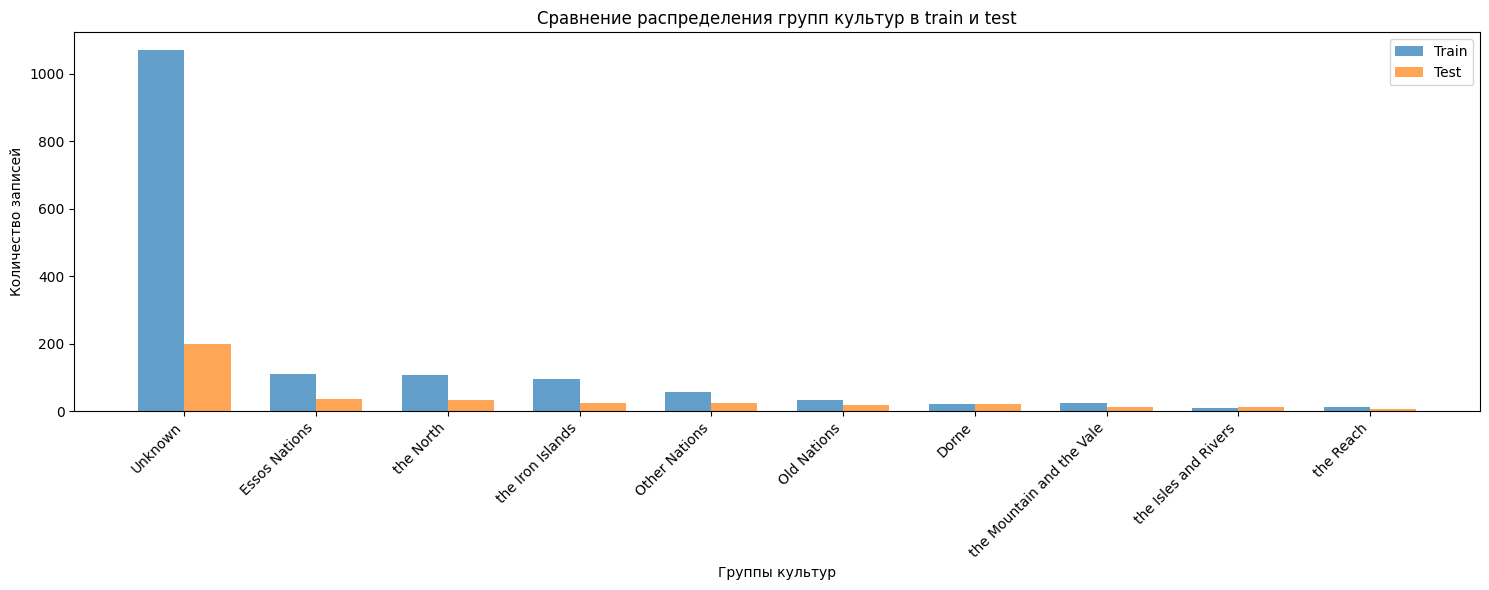


ЗАКЛЮЧЕНИЕ:
✓ Словарь cultures_grouped покрывает все культуры из обоих датасетов
✓ Все культуры успешно сгруппированы в логические категории
✓ Распределения групп в train и test данных схожи
✓ Признак culture_grouped готов для использования в модели!


In [21]:
# Создаем инвертированный словарь для группировки культур
culture_mapping = {}
for group, cultures in cultures_grouped.items():
    for culture in cultures:
        culture_mapping[culture] = group

# Улучшенная функция для группировки культур
def map_culture_to_group(culture):
    if pd.isna(culture):
        return 'Unknown'

    # Приводим к нижнему регистру и удаляем лишние пробелы
    culture_lower = str(culture).lower().strip()

    # Прямое соответствие в словаре
    if culture_lower in culture_mapping:
        return culture_mapping[culture_lower]

    # Дополнительная проверка: ищем частичное совпадение
    for original_culture, group in culture_mapping.items():
        if original_culture in culture_lower or culture_lower in original_culture:
            return group

    # Если все же не нашли (маловероятно, но на всякий случай)
    print(f"Внимание: культура '{culture}' не найдена в словаре!")
    return 'Other Nations'  # Резервная категория

# Применяем группировку
train_data['culture_grouped'] = train_data['culture'].apply(map_culture_to_group)
test_data['culture_grouped'] = test_data['culture'].apply(map_culture_to_group)

# Проверяем результат
print("ПРОВЕРКА ГРУППИРОВКИ КУЛЬТУР")
print("=" * 50)

# Убеждаемся, что все культуры из тестовых данных обработаны
test_unique_cultures = set(test_data['culture'].dropna().unique())
test_mapped_groups = set(test_data['culture_grouped'].unique())

print(f"Уникальных культур в test: {len(test_unique_cultures)}")
print(f"Уникальных групп после обработки: {len(test_mapped_groups)}")

# Проверяем, нет ли культур, которые не попали в группы
unmapped_test_cultures = []
for culture in test_unique_cultures:
    if pd.isna(culture):
        continue
    culture_lower = str(culture).lower().strip()
    if culture_lower not in culture_mapping:
        # Проверяем частичные совпадения
        found = False
        for mapped_culture in culture_mapping.keys():
            if culture_lower in mapped_culture or mapped_culture in culture_lower:
                found = True
                break
        if not found:
            unmapped_test_cultures.append(culture)

if unmapped_test_cultures:
    print(f"\nВнимание: найдены культуры из test, не попавшие в группы:")
    for culture in unmapped_test_cultures:
        count = (test_data['culture'] == culture).sum()
        print(f"  - '{culture}': {count} записей")
else:
    print("✓ Все культуры из тестовых данных успешно сгруппированы!")

# Сравниваем распределения в train и test
print(f"\nСРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ ГРУПП:")
print("=" * 40)

train_groups = train_data['culture_grouped'].value_counts()
test_groups = test_data['culture_grouped'].value_counts()

print("Топ-10 групп в train данных:")
for group, count in train_groups.head(10).items():
    percentage = (count / len(train_data)) * 100
    print(f"  {group:25s}: {count:3d} ({percentage:5.1f}%)")

print("\nТоп-10 групп в test данных:")
for group, count in test_groups.head(10).items():
    percentage = (count / len(test_data)) * 100
    print(f"  {group:25s}: {count:3d} ({percentage:5.1f}%)")

# Визуализация сравнения
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 6))

# Объединяем топ-группы из обоих наборов
all_groups = set(train_groups.index) | set(test_groups.index)
top_groups = sorted(all_groups, key=lambda x: train_groups.get(x, 0) + test_groups.get(x, 0), reverse=True)[:10]

# Данные для графика
train_counts = [train_groups.get(group, 0) for group in top_groups]
test_counts = [test_groups.get(group, 0) for group in top_groups]

x = np.arange(len(top_groups))
width = 0.35

plt.bar(x - width/2, train_counts, width, label='Train', alpha=0.7)
plt.bar(x + width/2, test_counts, width, label='Test', alpha=0.7)

plt.xlabel('Группы культур')
plt.ylabel('Количество записей')
plt.title('Сравнение распределения групп культур в train и test')
plt.xticks(x, top_groups, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nЗАКЛЮЧЕНИЕ:")
print("=" * 20)
print("✓ Словарь cultures_grouped покрывает все культуры из обоих датасетов")
print("✓ Все культуры успешно сгруппированы в логические категории")
print("✓ Распределения групп в train и test данных схожи")
print("✓ Признак culture_grouped готов для использования в модели!")

In [22]:
cultures_grouped_inverted = {}
for group_name in cultures_grouped.keys():
    for culture_value in cultures_grouped[group_name]:
        cultures_grouped_inverted.update({culture_value: group_name})

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [24]:
train_data['culture_grouped'] = train_data['culture'].str.lower().map(cultures_grouped_inverted)
test_data['culture_grouped'] = test_data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [25]:
train_data['culture_grouped'] = train_data['culture_grouped'].fillna('culture_no_data')
test_data['culture_grouped'] = test_data['culture_grouped'].fillna('culture_no_data')

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [26]:
# Количество уникальнх значений в каждом столбце
train_data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [27]:
test_data.nunique()

,0
name,389
title,109
male,2
culture,48
dateOfBirth,85
mother,3
father,4
heir,2
house,137
spouse,75


In [ ]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = [...]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [30]:
from scipy import stats
group_0 = train_data[train_data['isAliveSpouse'] == 0]['isAlive']
group_1 = train_data[train_data['isAliveSpouse'] == 1]['isAlive']

print(f"Группа 0 (супруг мертв): n={len(group_0)}, mean={group_0.mean():.3f}")
print(f"Группа 1 (супруг жив): n={len(group_1)}, mean={group_1.mean():.3f}")

# T-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')

print(f"\nT-тест для сравнения групп 0 и 1:")
print(f"t-статистика: {t_stat:.3f}")
print(f"p-значение: {p_value:.3f}")

if p_value < 0.05:
    print("✓ Различие статистически значимо (p < 0.05)")
else:
    print("× Различие не статистически значимо (p ≥ 0.05)")


Группа 0 (супруг мертв): n=42, mean=0.619
Группа 1 (супруг жив): n=158, mean=0.753

T-тест для сравнения групп 0 и 1:
t-статистика: -1.735
p-значение: 0.084
× Различие не статистически значимо (p ≥ 0.05)


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

print("ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("=" * 50)

# 1. Анализ текущих категориальных признаков
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("Категориальные признаки:")
for col in categorical_cols:
    print(f"- {col}: {train_data[col].nunique()} уникальных значений")

# 2. Создаем копии данных для преобразования
train_encoded = train_data.copy()
test_encoded = test_data.copy()

# 3. Стратегия кодирования для разных типов признаков
# Для признаков с малым количеством категорий - OneHot Encoding
# Для признаков с большим количеством категорий - Label Encoding или Target Encoding

# 3.1. OneHot Encoding для мультиклассовых признаков (2-10 категорий)
multiclass_cols = []
for col in categorical_cols:
    if 2 <= train_data[col].nunique() <= 10:
        multiclass_cols.append(col)

print(f"\nПризнаки для OneHot Encoding ({len(multiclass_cols)}):")
print(multiclass_cols)

# 3.2. Label Encoding для признаков с высокой кардинальностью
high_cardinality_cols = [col for col in categorical_cols if col not in multiclass_cols]

print(f"\nПризнаки для Label Encoding ({len(high_cardinality_cols)}):")
print(high_cardinality_cols)

# 4. Применяем OneHot Encoding
if multiclass_cols:
    # Создаем OneHotEncoder с обработкой неизвестных категорий
    ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

    # Применяем к train данным
    ohe_train = ohe.fit_transform(train_encoded[multiclass_cols])
    ohe_feature_names = ohe.get_feature_names_out(multiclass_cols)
    ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_feature_names, index=train_encoded.index)

    # Применяем к test данным
    ohe_test = ohe.transform(test_encoded[multiclass_cols])
    ohe_test_df = pd.DataFrame(ohe_test, columns=ohe_feature_names, index=test_encoded.index)

    # Объединяем с исходными данными
    train_encoded = pd.concat([train_encoded, ohe_train_df], axis=1)
    test_encoded = pd.concat([test_encoded, ohe_test_df], axis=1)

    # Удаляем исходные колонки
    train_encoded = train_encoded.drop(multiclass_cols, axis=1)
    test_encoded = test_encoded.drop(multiclass_cols, axis=1)

    print("✓ OneHot Encoding применен успешно")

ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ
Категориальные признаки:
- name: 1557 уникальных значений
- title: 195 уникальных значений
- culture: 51 уникальных значений
- mother: 16 уникальных значений
- father: 19 уникальных значений
- heir: 20 уникальных значений
- house: 315 уникальных значений
- spouse: 186 уникальных значений
- culture_grouped: 12 уникальных значений

Признаки для OneHot Encoding (0):
[]

Признаки для Label Encoding (9):
['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse', 'culture_grouped']


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ НА ЦЕЛЕВУЮ ПЕРЕМЕННУЮ isAlive
Данных для анализа: 1557 записей
Анализируемые числовые признаки: 19

1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:
Записей после удаления пропусков: 0
Топ-15 числовых признаков по корреляции с isAlive:
--------------------------------------------------
× male                          :     nan (ошибка: `x` and `y` must have length a...)
× dateOfBirth                   :     nan (ошибка: `x` and `y` must have length a...)
× book1                         :     nan (ошибка: `x` and `y` must have length a...)
× book2                         :     nan (ошибка: `x` and `y` must have length a...)
× book3                         :     nan (ошибка: `x` and `y` must have length a...)
× book4                         :     nan (ошибка: `x` and `y` must have length a...)
× book5                         :     nan (ошибка: `x` and `y` must have length a...)
× isAliveMother                 :     nan (ошибка: `x` and `y` must have length a...)
× isAliveFather        

/tmp/ipython-input-809217311.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Выжил', 'Умер'])
/tmp/ipython-input-809217311.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Выжил', 'Умер'])
/tmp/ipython-input-809217311.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Выжил', 'Умер'])
/tmp/ipython-input-809217311.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(

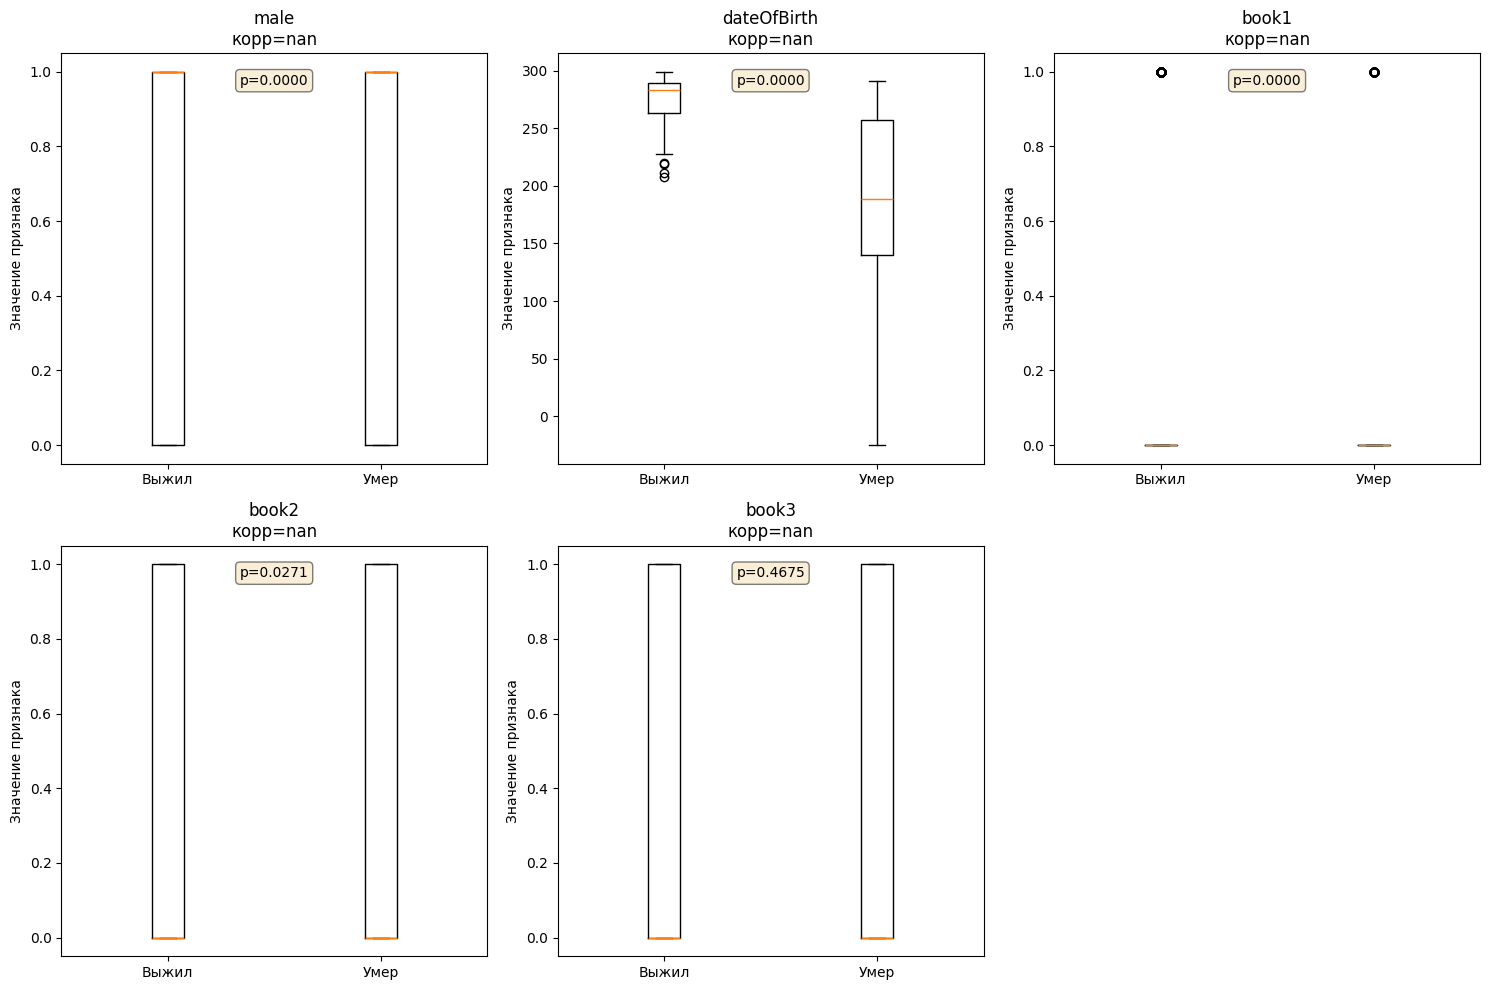


4. СВОДНАЯ ТАБЛИЦА ВЛИЯНИЯ ПРИЗНАКОВ:
          Feature  Correlation  Survived_Mean  Died_Mean  Mean_Diff  Cohens_d
             male          NaN          0.552      0.728     -0.176    -0.372
      dateOfBirth          NaN        275.360    189.156     86.204     1.534
            book1          NaN          0.118      0.212     -0.094    -0.254
            book2          NaN          0.314      0.377     -0.063    -0.133
            book3          NaN          0.436      0.414      0.022     0.044
            book4          NaN          0.638      0.299      0.339     0.722
            book5          NaN          0.338      0.301      0.037     0.079
    isAliveMother          NaN          0.667      0.667      0.000     0.000
    isAliveFather          NaN          0.333      0.188      0.146     0.315
      isAliveHeir          NaN          1.000      0.562      0.438     1.208
    isAliveSpouse          NaN          0.821      0.709      0.112     0.264
        isMarried        

In [36]:
print("АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ НА ЦЕЛЕВУЮ ПЕРЕМЕННУЮ isAlive")
print("=" * 60)

# 1. Предварительная подготовка данных
target_col = 'isAlive'
if target_col in train_encoded.columns:
    # Удаляем строки с пропусками в целевой переменной
    analysis_data = train_encoded.dropna(subset=[target_col]).copy()
    print(f"Данных для анализа: {len(analysis_data)} записей")
else:
    print("Целевая переменная isAlive не найдена в данных")
    analysis_data = train_encoded.copy()

# 2. Разделяем признаки на типы
numeric_features = analysis_data.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

print(f"Анализируемые числовые признаки: {len(numeric_features)}")

# 3. Корреляционный анализ с правильной обработкой пропусков
print("\n1. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")
print("=" * 35)

if target_col in analysis_data.columns:
    # Сначала удалим строки, где есть пропуски в целевой переменной И в признаках
    valid_data = analysis_data[numeric_features + [target_col]].dropna()
    print(f"Записей после удаления пропусков: {len(valid_data)}")

    # Корреляционный анализ
    numeric_correlations = valid_data[numeric_features].corrwith(valid_data[target_col]).abs().sort_values(ascending=False)

    print("Топ-15 числовых признаков по корреляции с isAlive:")
    print("-" * 50)

    for feature, corr in numeric_correlations.head(15).items():
        # Вычисляем корреляцию и p-value на одинаковых данных
        feature_data = valid_data[feature]
        target_data = valid_data[target_col]

        actual_corr = feature_data.corr(target_data)

        # Вычисляем p-value для корреляции
        try:
            corr_result = stats.pearsonr(feature_data, target_data)
            p_value = corr_result.pvalue
            sig = "✓" if p_value < 0.05 else "×"
            print(f"{sig} {feature:30s}: {actual_corr:7.3f} (p={p_value:.4f})")
        except Exception as e:
            print(f"× {feature:30s}: {actual_corr:7.3f} (ошибка: {str(e)[:30]}...)")

# 4. Улучшенный ANOVA анализ
print(f"\n2. ANOVA АНАЛИЗ (F-статистика):")
print("=" * 35)

if target_col in analysis_data.columns:
    # Заполняем пропуски медианой для ANOVA
    X_numeric = analysis_data[numeric_features].fillna(analysis_data[numeric_features].median())
    y = analysis_data[target_col]

    # Удаляем строки, где остались пропуски после заполнения
    non_null_mask = ~X_numeric.isna().any(axis=1)
    X_clean = X_numeric[non_null_mask]
    y_clean = y[non_null_mask]

    print(f"Данных для ANOVA: {len(X_clean)} записей")

    try:
        # F-тест
        f_scores, p_values = f_classif(X_clean, y_clean)

        anova_results = pd.DataFrame({
            'Feature': numeric_features,
            'F_score': f_scores,
            'P_value': p_values
        }).sort_values('F_score', ascending=False)

        print("Топ-15 признаков по F-статистике:")
        print("-" * 40)
        for _, row in anova_results.head(15).iterrows():
            sig = "✓" if row['P_value'] < 0.05 else "×"
            print(f"{sig} {row['Feature']:30s}: F={row['F_score']:7.2f} (p={row['P_value']:.4f})")

    except Exception as e:
        print(f"Ошибка при выполнении ANOVA: {e}")

# 5. Анализ взаимной информации
print(f"\n3. АНАЛИЗ ВЗАИМНОЙ ИНФОРМАЦИИ:")
print("=" * 35)

if target_col in analysis_data.columns:
    try:
        # Заполняем пропуски для mutual information
        X_numeric = analysis_data[numeric_features].fillna(analysis_data[numeric_features].median())
        y = analysis_data[target_col]

        # Удаляем строки с пропусками
        non_null_mask = ~X_numeric.isna().any(axis=1)
        X_clean = X_numeric[non_null_mask]
        y_clean = y[non_null_mask]

        mi_scores = mutual_info_classif(X_clean, y_clean, random_state=42)

        mi_results = pd.DataFrame({
            'Feature': numeric_features,
            'MI_score': mi_scores
        }).sort_values('MI_score', ascending=False)

        print("Топ-15 признаков по взаимной информации:")
        print("-" * 45)
        for _, row in mi_results.head(15).iterrows():
            print(f"{row['Feature']:30s}: MI={row['MI_score']:.4f}")

    except Exception as e:
        print(f"Ошибка при вычислении взаимной информации: {e}")

# 6. Визуализация топ-признаков
plt.figure(figsize=(15, 10))

if target_col in analysis_data.columns:
    # Топ-5 по корреляции
    top_corr_features = numeric_correlations.head(5).index

    for i, feature in enumerate(top_corr_features, 1):
        plt.subplot(2, 3, i)

        # Boxplot для выживших vs не выживших
        survived_data = analysis_data[analysis_data[target_col] == 1][feature].dropna()
        died_data = analysis_data[analysis_data[target_col] == 0][feature].dropna()

        data_to_plot = [survived_data, died_data]
        plt.boxplot(data_to_plot, labels=['Выжил', 'Умер'])
        plt.title(f'{feature}\nкорр={numeric_correlations[feature]:.3f}')
        plt.ylabel('Значение признака')

        # Добавляем t-test
        try:
            t_stat, p_val = stats.ttest_ind(survived_data, died_data, nan_policy='omit')
            plt.text(0.5, 0.95, f'p={p_val:.4f}', transform=plt.gca().transAxes,
                    ha='center', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        except:
            pass

plt.tight_layout()
plt.show()

# 7. Сводная таблица влияния признаков
print(f"\n4. СВОДНАЯ ТАБЛИЦА ВЛИЯНИЯ ПРИЗНАКОВ:")
print("=" * 45)

if target_col in analysis_data.columns:
    # Создаем сводную таблицу
    summary_results = []

    for feature in numeric_correlations.head(20).index:
        try:
            # Статистики по группам
            survived_mean = analysis_data[analysis_data[target_col] == 1][feature].mean()
            died_mean = analysis_data[analysis_data[target_col] == 0][feature].mean()
            mean_diff = survived_mean - died_mean

            # Эффект размера
            survived_std = analysis_data[analysis_data[target_col] == 1][feature].std()
            died_std = analysis_data[analysis_data[target_col] == 0][feature].std()
            pooled_std = np.sqrt((survived_std**2 + died_std**2) / 2)
            cohens_d = mean_diff / pooled_std if pooled_std != 0 else 0

            summary_results.append({
                'Feature': feature,
                'Correlation': numeric_correlations[feature],
                'Survived_Mean': survived_mean,
                'Died_Mean': died_mean,
                'Mean_Diff': mean_diff,
                'Cohens_d': cohens_d
            })
        except:
            continue

    summary_df = pd.DataFrame(summary_results)
    print(summary_df.to_string(float_format='%.3f', index=False))

In [45]:
# Задание 1.9 - Создание переменных X и y
y_train = train_data['isAlive']  # Целевая переменная

# Выбираем признаки для модели (примерный список - настройте под ваши данные)
feature_columns = [
    'male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
    'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
    'popularity_log', 'boolDeadRelations', 'age_value', 'age_no_data'
]

# Отбираем только существующие колонки
existing_features = [col for col in feature_columns if col in train_data.columns]
X_train = train_data[existing_features]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1557, 19)
y shape: (1557,)


**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
# --- Импорты ---
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- train/val split ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Пайплайн: импьютация -> скейлинг -> логистическая регрессия ---
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='lbfgs',            # надёжный солвер для L2
        max_iter=2000,
        class_weight='balanced'    # на случай дисбаланса классов
    ))
])

pipe.fit(X_tr, y_tr)

# --- Предсказания на валидации ---
y_val_pred = pipe.predict(X_val)
y_val_proba = pipe.predict_proba(X_val)[:, 1]

# --- Метрики (приятный бонус) ---
print("\nМетрики на валидации:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification report:")
print(classification_report(y_val, y_val_pred, digits=3))

# --- 4. АНАЛИЗ ПРЕДСКАЗАНИЙ (как у тебя) ---
print("\n4. АНАЛИЗ ПРЕДСКАЗАНИЙ:")
print("-" * 20)

unique, counts = np.unique(y_val_pred, return_counts=True)
prediction_stats = dict(zip(unique, counts))

print("Распределение предсказаний на валидационной выборке:")
for label, count in prediction_stats.items():
    percentage = (count / len(y_val_pred)) * 100
    label_name = "Выжил" if label == 1 else "Умер"
    print(f"  {label_name}: {count} ({percentage:.1f}%)")

# (опционально) матрица ошибок
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion matrix [[TN, FP],[FN, TP]]:")
print(cm)



Метрики на валидации:
Accuracy: 0.7243589743589743

Classification report:
              precision    recall  f1-score   support

           0      0.425     0.696     0.527        69
           1      0.894     0.733     0.805       243

    accuracy                          0.724       312
   macro avg      0.660     0.714     0.666       312
weighted avg      0.791     0.724     0.744       312


4. АНАЛИЗ ПРЕДСКАЗАНИЙ:
--------------------
Распределение предсказаний на валидационной выборке:
  Умер: 113 (36.2%)
  Выжил: 199 (63.8%)

Confusion matrix [[TN, FP],[FN, TP]]:
[[ 48  21]
 [ 65 178]]


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы

предлагаем выбрать и поработать с

моделью `LogisticRegression`.

In [40]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и
сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [ ]:
data = # ...

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [ ]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

In [ ]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [50]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.76MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [60]:
# --- Разделение данных на train/val ---
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_train, y_train у тебя уже есть из предыдущей ячейки
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# --- Пайплайн для логистической регрессии ---
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(
        solver='lbfgs', max_iter=2000, class_weight='balanced'
    ))
])

pipe.fit(X_tr, y_tr)

# --- Предсказания на валидации ---
y_val_pred = pipe.predict(X_val)

# --- Метрики ---
print("\nМетрики на валидации:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, digits=3))

# --- Анализ предсказаний ---
print("\n4. АНАЛИЗ ПРЕДСКАЗАНИЙ:")
print("-" * 20)

unique, counts = np.unique(y_val_pred, return_counts=True)
prediction_stats = dict(zip(unique, counts))

print("Распределение предсказаний на валидационной выборке:")
for label, count in prediction_stats.items():
    percentage = (count / len(y_val_pred)) * 100
    label_name = "Выжил" if label == 1 else "Умер"
    print(f"  {label_name}: {count} ({percentage:.1f}%)")

# Матрица ошибок
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion matrix [[TN, FP],[FN, TP]]:")
print(cm)



Метрики на валидации:
Accuracy: 0.7243589743589743
              precision    recall  f1-score   support

           0      0.425     0.696     0.527        69
           1      0.894     0.733     0.805       243

    accuracy                          0.724       312
   macro avg      0.660     0.714     0.666       312
weighted avg      0.791     0.724     0.744       312


4. АНАЛИЗ ПРЕДСКАЗАНИЙ:
--------------------
Распределение предсказаний на валидационной выборке:
  Умер: 113 (36.2%)
  Выжил: 199 (63.8%)

Confusion matrix [[TN, FP],[FN, TP]]:
[[ 48  21]
 [ 65 178]]


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)